In [314]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from sklearn.impute import SimpleImputer


penguins_df=pd.read_csv('penguins_lter.csv')
penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


Columns deemed irrelivant are removed from dataset

In [315]:
penguins_df=penguins_df.drop(['Region','Stage','Individual ID','studyName','Sample Number', 'Comments'],axis=1)

<AxesSubplot: >

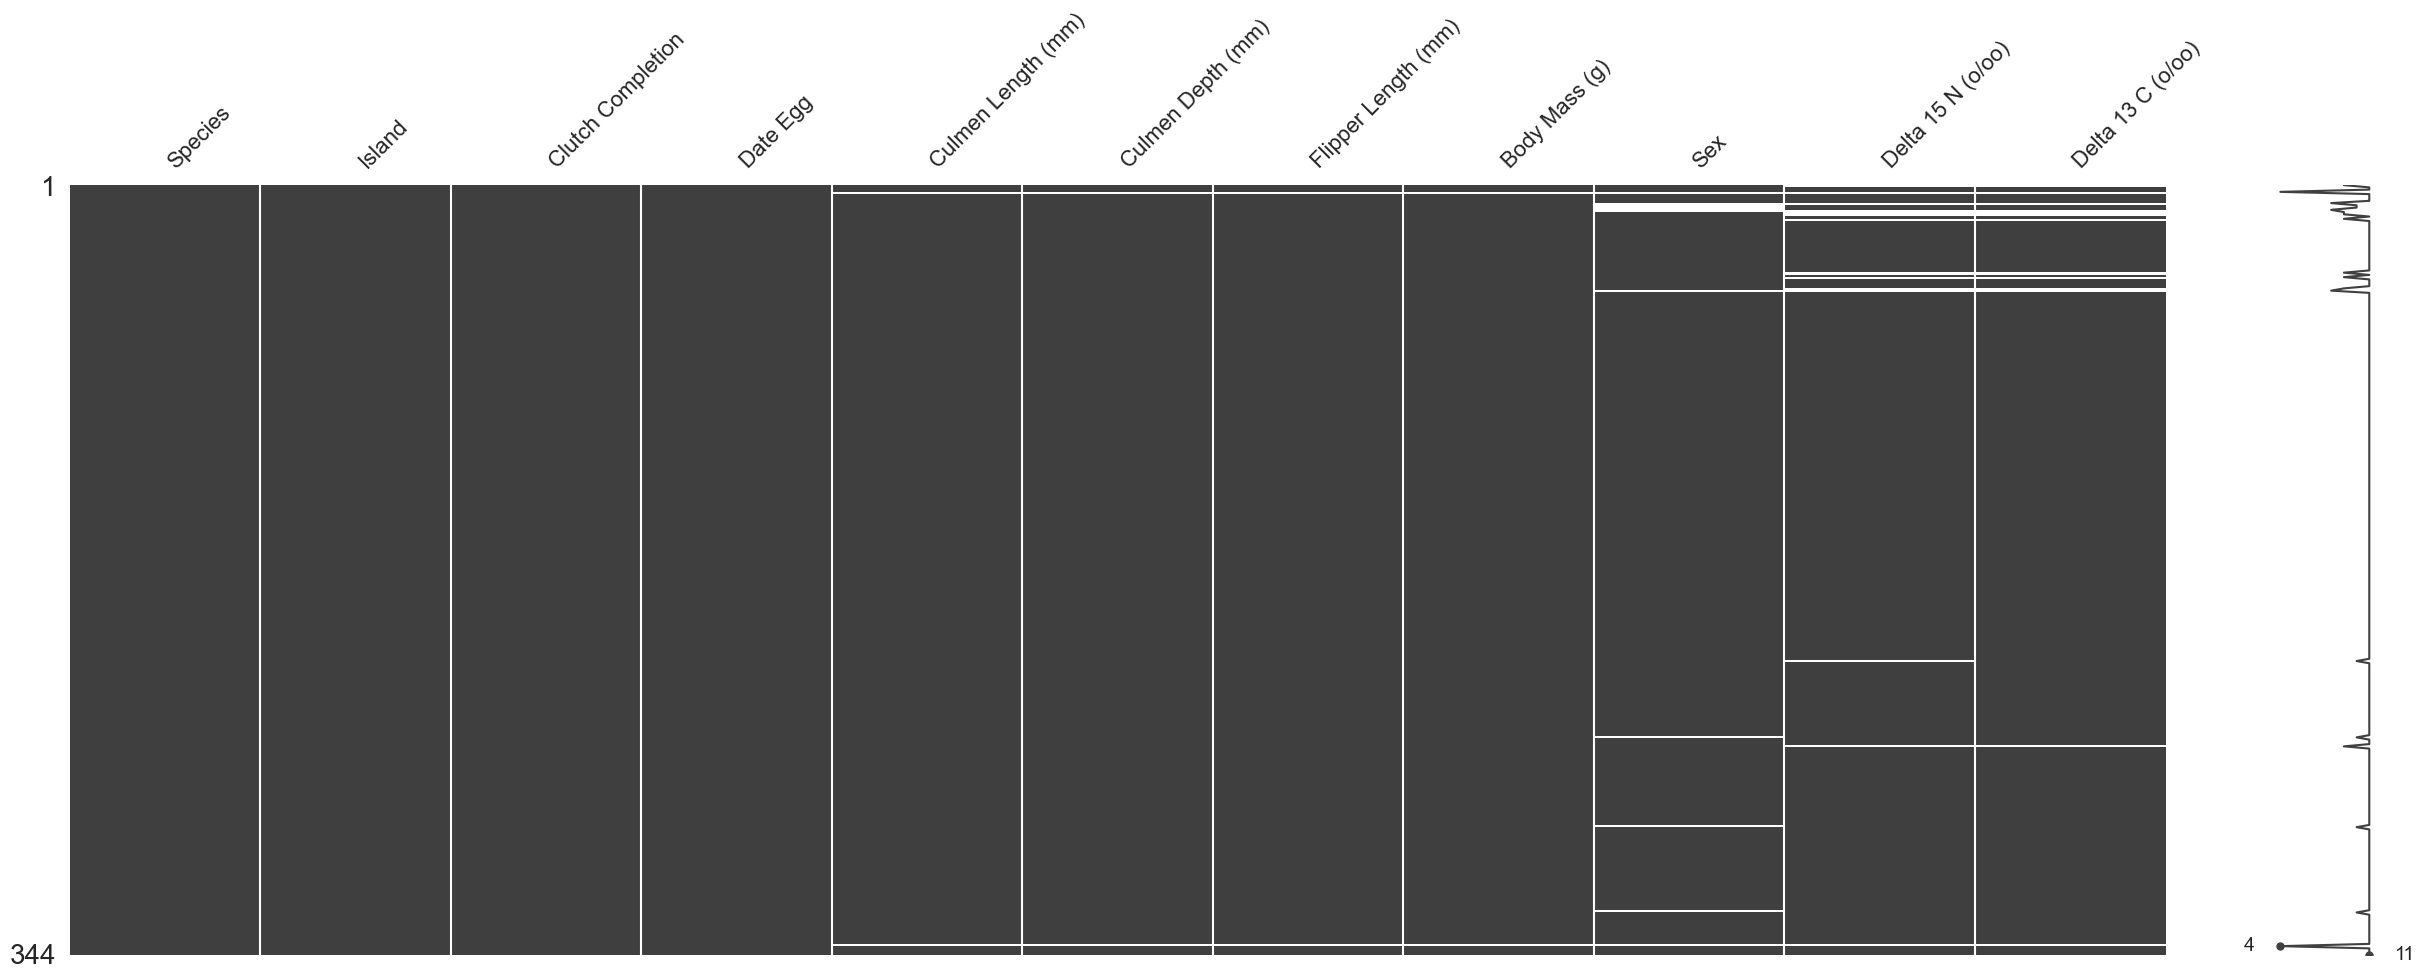

In [316]:
missingno.matrix(penguins_df, figsize = (30,10))


In [317]:
print(penguins_df['Sex'].unique())

['MALE' 'FEMALE' nan '.']


Sex column has a '.' likely added in error. Will be removed and replaced with null value

In [318]:
penguins_df['Sex']=penguins_df['Sex'].replace('.',np.nan)

Various areas with missing data. Imputation will be applied.

In [319]:
imputer = SimpleImputer(strategy='most_frequent') 
penguins_df.iloc[:,:] = imputer.fit_transform(penguins_df)
penguins_df

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,7.63220,-27.01854
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,No,12/01/2009,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854
340,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [320]:
penguins_df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.905523,17.150291,200.851744,4199.418605,8.688566,-25.736638
std,5.447882,1.969061,14.045266,800.197923,0.582669,0.819274
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.275000,15.600000,190.000000,3550.000000,8.257485,-26.381680
50%,44.250000,17.300000,197.000000,4025.000000,8.633735,-25.897090
75%,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [321]:
penguins_df.dtypes

Species                 object
Island                  object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

Date egg column should be in datetime format. A new column with be created specifying year only. All other columns are in an appropriate format.

In [322]:
penguins_df['Date Egg']=pd.to_datetime(penguins_df['Date Egg'])
penguins_df['Year Egg']=penguins_df['Date Egg'].dt.year
penguins_df.dtypes

Species                        object
Island                         object
Clutch Completion              object
Date Egg               datetime64[ns]
Culmen Length (mm)            float64
Culmen Depth (mm)             float64
Flipper Length (mm)           float64
Body Mass (g)                 float64
Sex                            object
Delta 15 N (o/oo)             float64
Delta 13 C (o/oo)             float64
Year Egg                        int64
dtype: object

Penguin names were shortened to make them more consice

In [323]:
penguins_df['Species']=penguins_df['Species'].replace('Adelie Penguin (Pygoscelis adeliae)','Adelie').replace('Chinstrap penguin (Pygoscelis antarctica)','Chinstrap').replace('Gentoo penguin (Pygoscelis papua)','Gentoo')
penguins_df

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Year Egg
0,Adelie,Torgersen,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,7.63220,-27.01854,2007
1,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,2007
2,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,2007
3,Adelie,Torgersen,Yes,2007-11-16,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854,2007
4,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,No,2009-12-01,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854,2009
340,Gentoo,Biscoe,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,2009
341,Gentoo,Biscoe,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,2009
342,Gentoo,Biscoe,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,2009


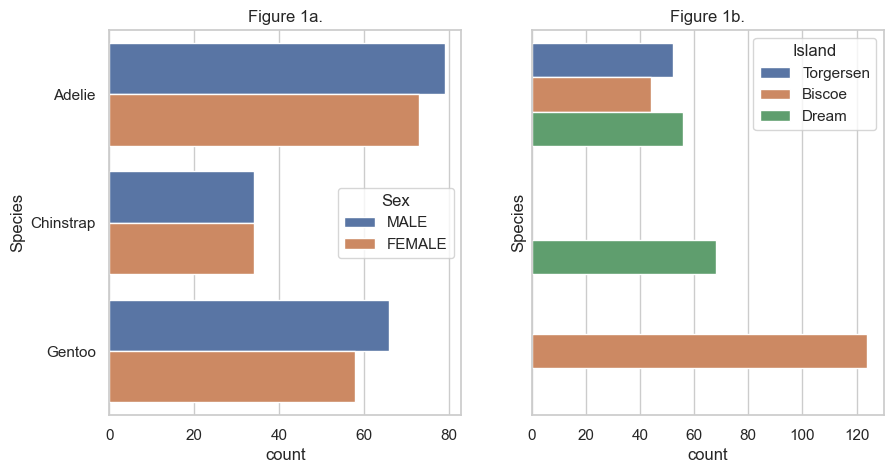

In [362]:
fig, ax=plt.subplots(1,2,sharey=True,figsize=(10,5))

cluster=['Sex','Island']
subplot=['a','b']
for i in range(len(cluster)):
    sns.countplot(y='Species',hue=cluster[i],data=penguins_df,ax=ax[i])
    ax[i].set_title(f'Figure 1{subplot[i]}.')



C:\Users\josh_\AppData\Local\Temp\ipykernel_12024\1609800385.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\josh_\AppData\Local\Temp\ipykernel_12024\1609800385.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\josh_\AppData\Local\Temp\ipykernel_12024\1609800385.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


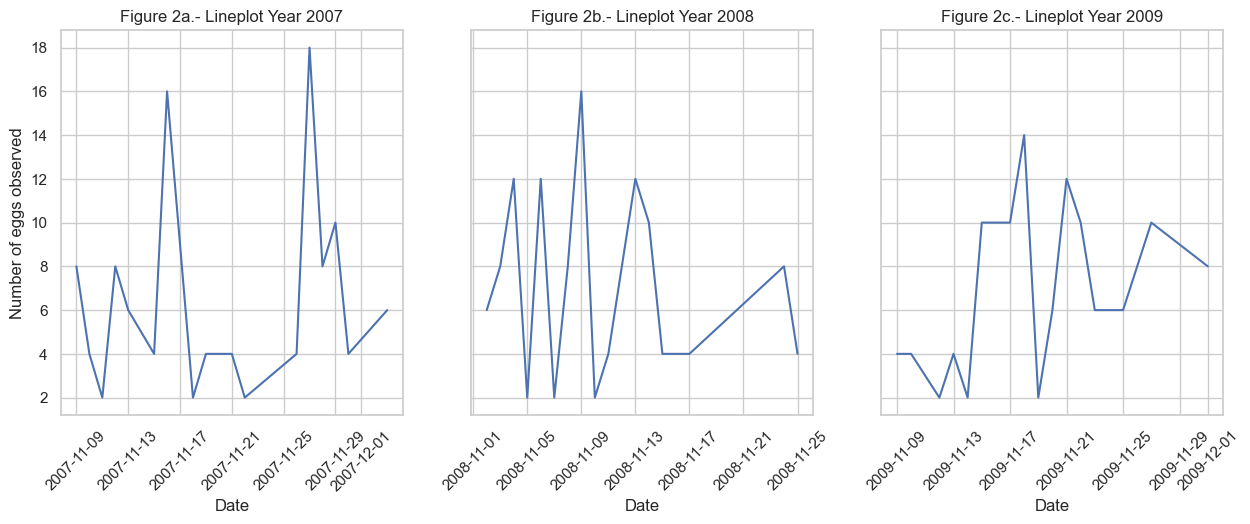

In [325]:
years = [2007,2008,2009]
subplot=['a','b','c']
fig, ax=plt.subplots(1,3,sharey=True,figsize=(15,5))

for i in range(len(years)):
    year_data = penguins_df[penguins_df['Year Egg'] == years[i]]
    egg_date = year_data.groupby(year_data['Date Egg']).count()
    sns.lineplot(data=egg_date, x=egg_date.index, y='Clutch Completion',ax=ax[i])
    ax[i].set_title(f'Figure 2{subplot[i]}.- Lineplot Year {years[i]}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Number of eggs observed')

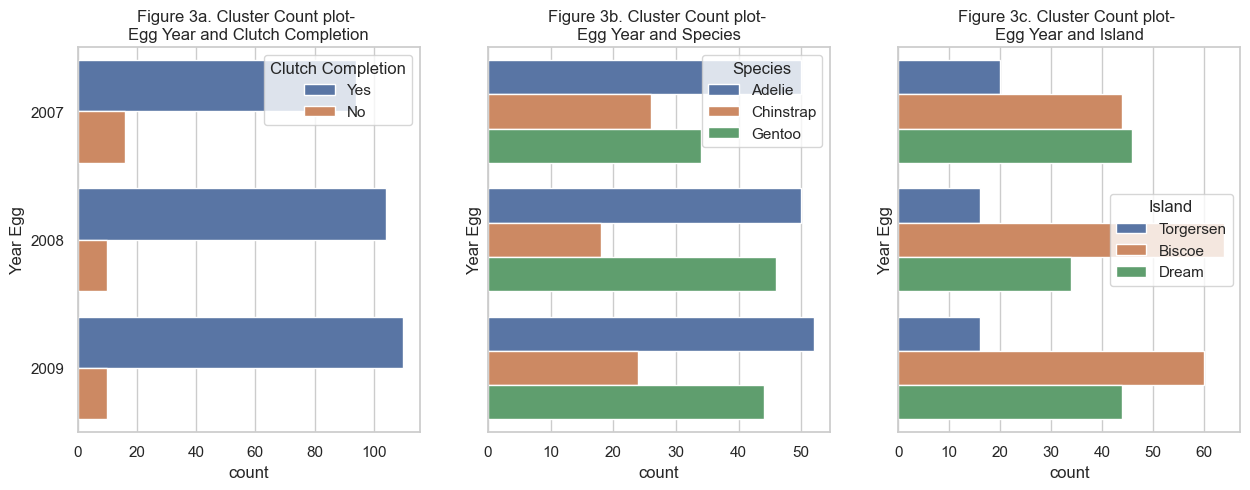

In [326]:
fig, ax=plt.subplots(1,3,sharey=True,figsize=(15,5))
variables=['Clutch Completion','Species','Island']
subplot=['a','b','c']
for i in range(len(variables)):
    sns.countplot(y='Year Egg',hue=variables[i],data=penguins_df,ax=ax[i])
    ax[i].set_title(f'Figure 3{subplot[i]}. Cluster Count plot- \nEgg Year and {variables[i]}')


# sns.countplot(y='Year Egg',hue='Species',data=penguins_df,ax=ax[1])

# ax[1].set_title(f'Figure 3b. Cluster Count plot- Egg Year and Species')

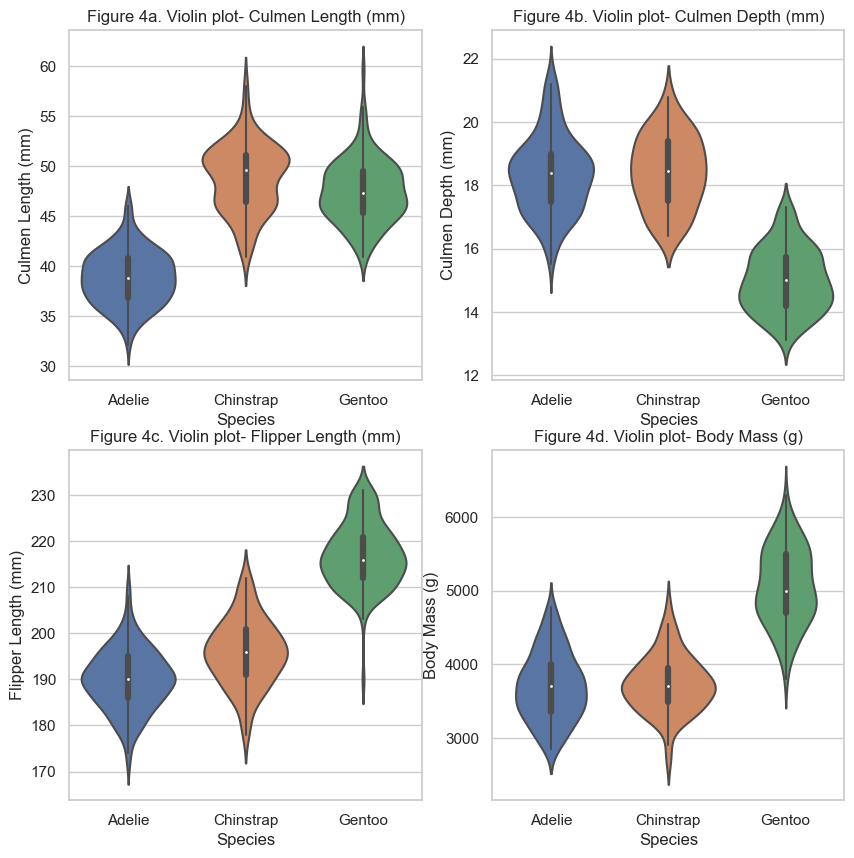

In [327]:
variables=[  ['Culmen Length (mm)','Culmen Depth (mm)'],
                ['Flipper Length (mm)','Body Mass (g)'] ]
subplot=[       ['a','b'],
                ['c','d'] ]
nrows=len(variables)
ncols=len(variables)
fig, ax=plt.subplots(nrows,ncols,figsize=(10,10))

for i in range(nrows):
    for j in range(ncols):
        sns.violinplot(x='Species',y=variables[i][j], data=penguins_df,ax=ax[i][j])
        ax[i][j].set_title(f'Figure 4{subplot[i][j]}. Violin plot- {variables[i][j]}')



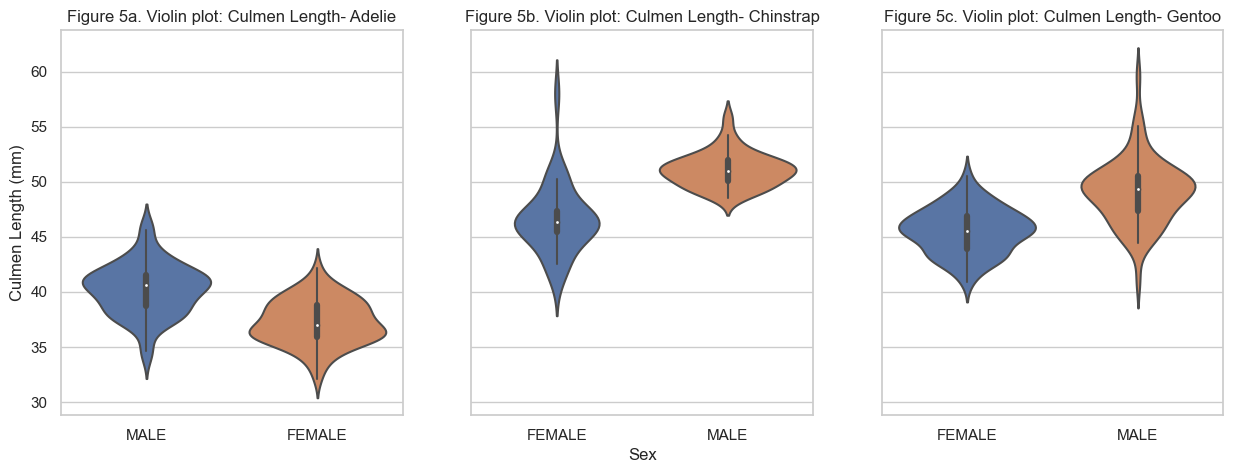

In [328]:
adelie=penguins_df[penguins_df['Species']=='Adelie']
chinstrap=penguins_df[penguins_df['Species']=='Chinstrap']
gentoo=penguins_df[penguins_df['Species']=='Gentoo']
species=[adelie,chinstrap,gentoo]
subplot=['a','b','c']
species_name=['Adelie','Chinstrap','Gentoo']

fig, ax=plt.subplots(1,3,figsize=(15,5),sharey=True)
for i in range(len(species)):
    sns.violinplot(x='Sex',y='Culmen Length (mm)', data=species[i],ax=ax[i])
    ax[i].set_title(f'Figure 5{subplot[i]}. Violin plot: Culmen Length- {species_name[i]}')
    if i!=0:
        ax[i].set_ylabel('')
    if i!=1:
        ax[i].set_xlabel('')


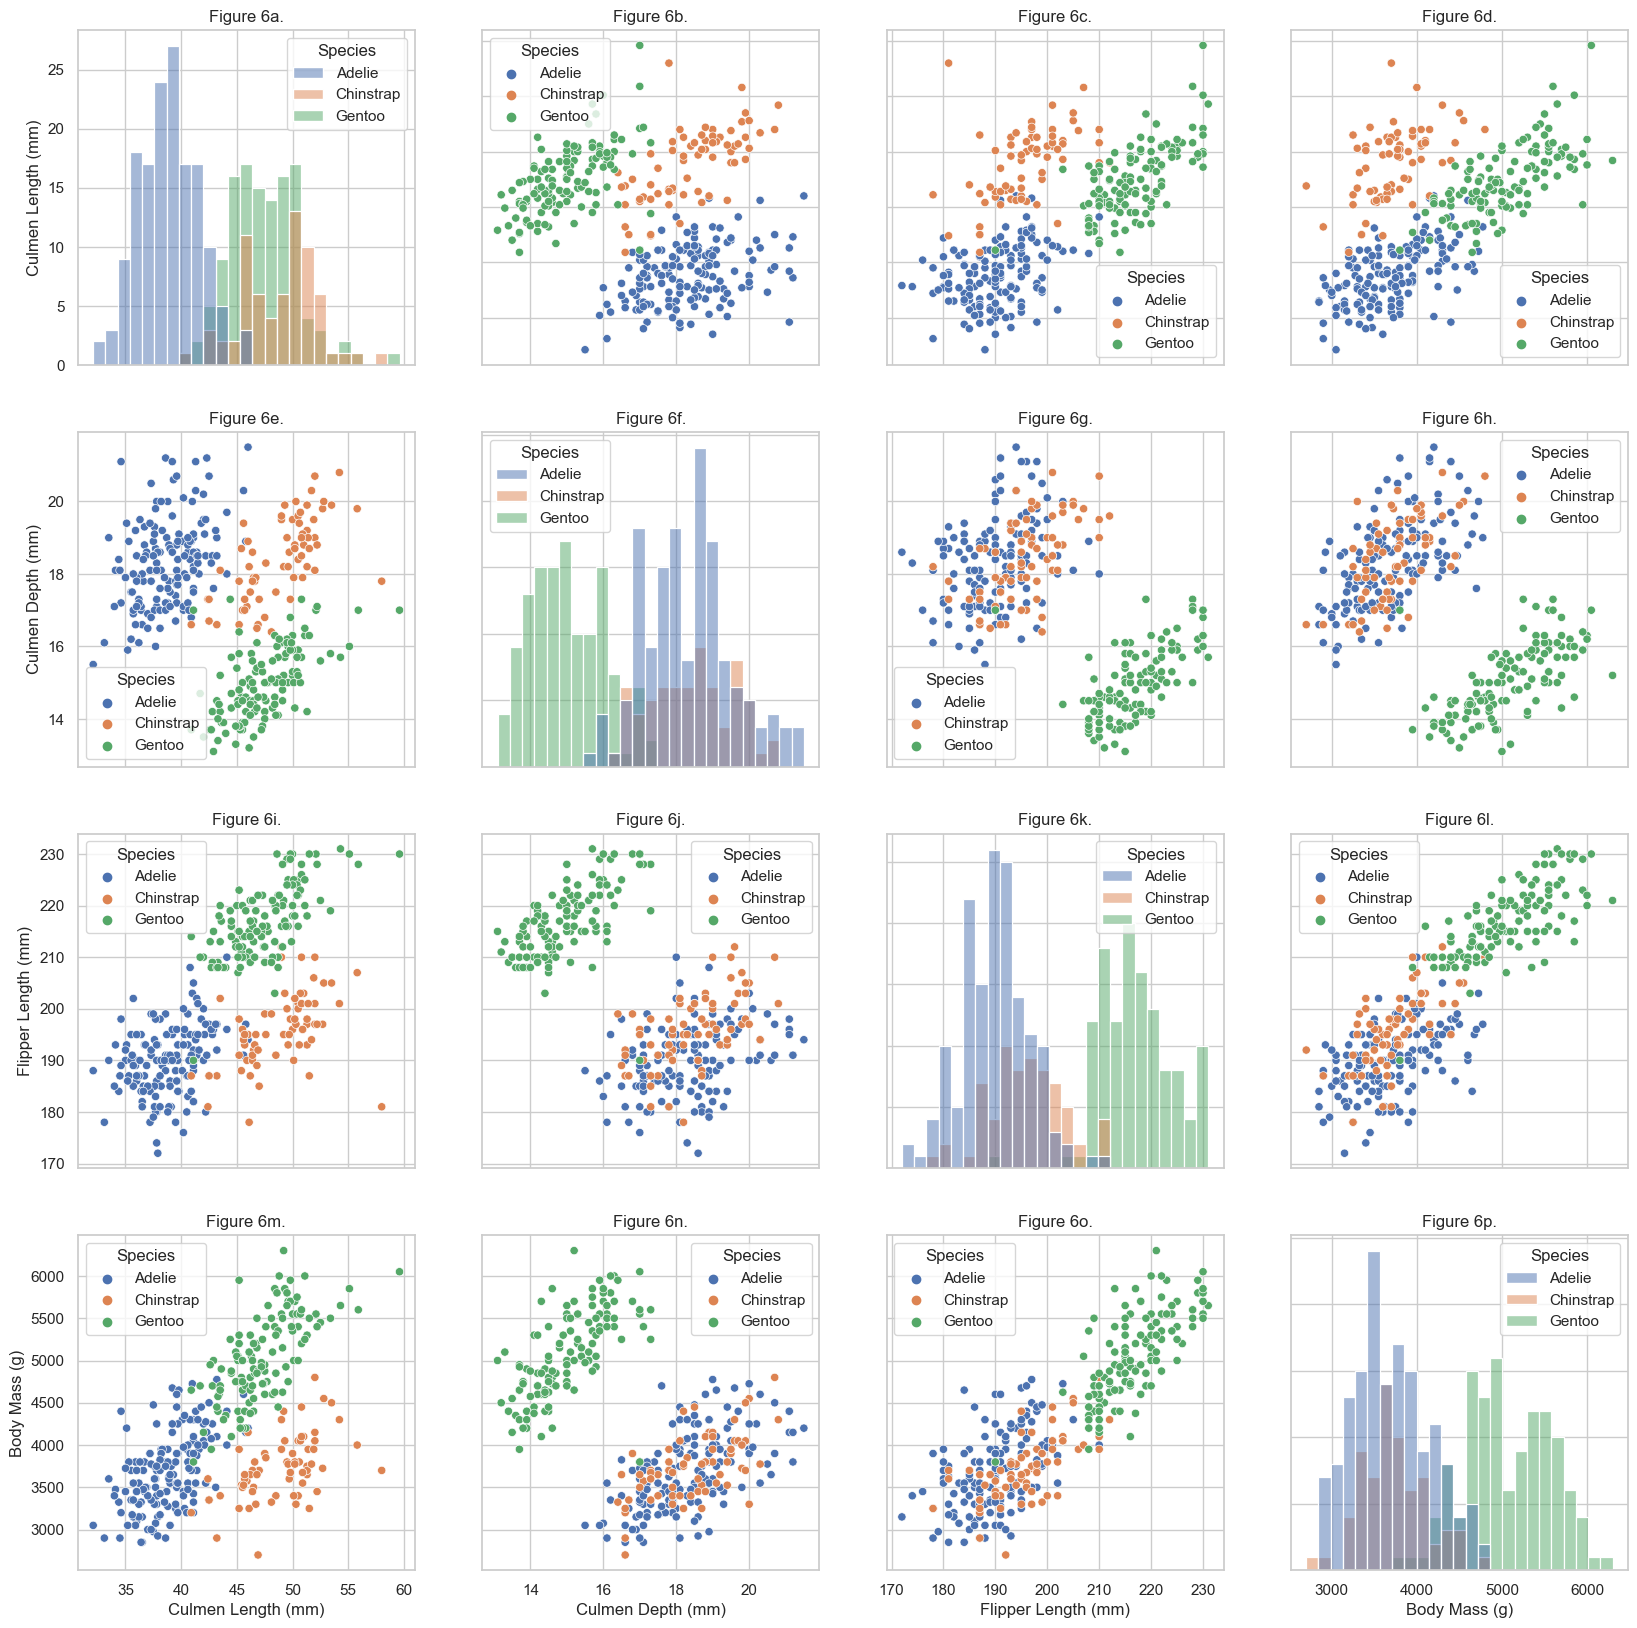

In [349]:
fig, ax=plt.subplots(4,4,figsize=(20,20))
variables=['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)']
subplot=[   ['a','b','c','d'],
            ['e','f','g','h'],
            ['i','j','k','l'],
            ['m','n','o','p'],
]

for i in range(len(variables)):
    for j in range(len(variables)):
        if i == j:
            sns.histplot(x=variables[i], hue='Species', bins=25, data=penguins_df,ax=ax[i][j])
            ax[i][j].set_title(f'Figure 6{subplot[i][j]}.')
        else:
            sns.scatterplot(x=variables[j], y=variables[i], hue='Species', data=penguins_df,ax=ax[i][j])
            ax[i][j].set_title(f'Figure 6{subplot[i][j]}.')

        if i==3: 
            ax[i][j].set_xlabel(variables[j])
        else:
            ax[i][j].set_xlabel('')
            ax[i][j].set_xticklabels('')
        if j==0:    
            ax[i][j].set_ylabel(variables[i])
        else:
            ax[i][j].set_ylabel('')
            ax[i][j].set_yticklabels('')


Text(0.5, 1.0, 'Figure 7c. Scatter plot-\nBody Mass verses Culmen Depth')

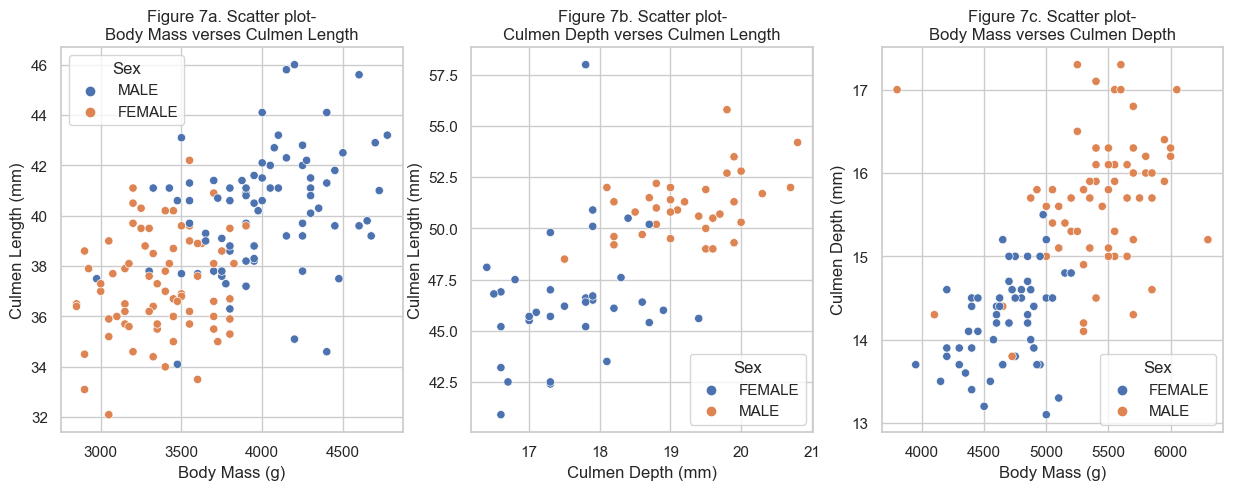

In [354]:
fig, ax=plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(x='Body Mass (g)',y='Culmen Length (mm)', hue='Sex', data=adelie,ax=ax[0])
ax[0].set_title(f'Figure 7a. Scatter plot-\nBody Mass verses Culmen Length')

sns.scatterplot(x='Culmen Depth (mm)',y='Culmen Length (mm)', hue='Sex', data=chinstrap,ax=ax[1])
ax[1].set_title(f'Figure 7b. Scatter plot-\nCulmen Depth verses Culmen Length')

sns.scatterplot(x='Body Mass (g)',y='Culmen Depth (mm)', hue='Sex', data=gentoo,ax=ax[2])
ax[2].set_title(f'Figure 7c. Scatter plot-\nBody Mass verses Culmen Depth')


In [330]:
# fig, ax=plt.subplots(4,4,figsize=(10,10))

# #Row 1
# sns.histplot(x='Culmen Length (mm)', hue='Species', bins=25, data=penguins_df,ax=ax[0][0])
# ax[0][0].set_ylabel('Culmen Length (mm)')
# ax[0][0].set_xlabel('')
# ax[0][0].set_xticklabels('')

# sns.scatterplot(x='Culmen Depth (mm)', y='Culmen Length (mm)', hue='Species', data=penguins_df,ax=ax[0][1])
# ax[0][1].set_ylabel('')
# ax[0][1].set_yticklabels('')
# ax[0][1].set_xlabel('')
# ax[0][1].set_xticklabels('')

# sns.scatterplot(x='Flipper Length (mm)', y='Culmen Length (mm)', hue='Species', data=penguins_df,ax=ax[0][2])
# ax[0][2].set_ylabel('')
# ax[0][2].set_yticklabels('')
# ax[0][2].set_xlabel('')
# ax[0][2].set_xticklabels('')

# sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue='Species', data=penguins_df,ax=ax[0][3])
# ax[0][3].set_ylabel('')
# ax[0][3].set_yticklabels('')
# ax[0][3].set_xlabel('')
# ax[0][3].set_xticklabels('')

# #Row 2
# sns.scatterplot(x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species', data=penguins_df,ax=ax[1][0])
# ax[1][0].set_ylabel('Culmen Depth (mm)')
# ax[1][0].set_xlabel('')
# ax[1][0].set_xticklabels('')

# sns.histplot(x='Culmen Depth (mm)', hue='Species', bins=25,data=penguins_df,ax=ax[1][1])
# ax[1][1].set_ylabel('')
# ax[1][1].set_yticklabels('')
# ax[1][1].set_xlabel('')
# ax[1][1].set_xticklabels('')

# sns.scatterplot(x='Flipper Length (mm)', y='Culmen Depth (mm)', hue='Species', data=penguins_df,ax=ax[1][2])
# ax[1][2].set_ylabel('')
# ax[1][2].set_yticklabels('')
# ax[1][2].set_xlabel('')
# ax[1][2].set_xticklabels('')

# sns.scatterplot(x='Body Mass (g)', y='Culmen Depth (mm)', hue='Species', data=penguins_df,ax=ax[1][3])
# ax[1][3].set_ylabel('')
# ax[1][3].set_yticklabels('')
# ax[1][3].set_xlabel('')
# ax[1][3].set_xticklabels('')

# #Row 3
# sns.scatterplot(x='Culmen Length (mm)', y='Flipper Length (mm)', hue='Species', data=penguins_df,ax=ax[2][0])
# ax[2][0].set_ylabel('Flipper Length (mm)')
# ax[2][0].set_xlabel('')
# ax[2][0].set_xticklabels('')

# sns.scatterplot(x='Culmen Depth (mm)', y='Flipper Length (mm)', hue='Species', data=penguins_df,ax=ax[2][1])
# ax[2][1].set_ylabel('')
# ax[2][1].set_yticklabels('')
# ax[2][1].set_xlabel('')
# ax[2][1].set_xticklabels('')

# sns.histplot(x='Flipper Length (mm)', hue='Species',bins=25, data=penguins_df,ax=ax[2][2])
# ax[2][2].set_ylabel('')
# ax[2][2].set_yticklabels('')
# ax[2][2].set_xlabel('')
# ax[2][2].set_xticklabels('')

# sns.scatterplot(x='Body Mass (g)', y='Flipper Length (mm)', hue='Species', data=penguins_df,ax=ax[2][3])
# ax[2][3].set_ylabel('')
# ax[2][3].set_yticklabels('')
# ax[2][3].set_xlabel('')
# ax[2][3].set_xticklabels('')

# #Row 4
# sns.scatterplot(x='Culmen Length (mm)', y='Body Mass (g)', hue='Species', data=penguins_df,ax=ax[3][0])
# ax[3][0].set_ylabel('Body Mass (g)')
# ax[3][0].set_xlabel('Culmen Length (mm)')

# sns.scatterplot(x='Culmen Depth (mm)', y='Body Mass (g)', hue='Species', data=penguins_df,ax=ax[3][1])
# ax[3][1].set_ylabel('')
# ax[3][1].set_yticklabels('')
# ax[3][1].set_xlabel('Culmen Depth (mm)')

# sns.scatterplot(x='Flipper Length (mm)', y='Body Mass (g)', hue='Species', data=penguins_df,ax=ax[3][2])
# ax[3][2].set_ylabel('')
# ax[3][2].set_yticklabels('')
# ax[3][2].set_xlabel('Flipper Length (mm)')

# sns.histplot(x='Body Mass (g)', hue='Species', bins=25,data=penguins_df,ax=ax[3][3])
# ax[3][3].set_ylabel('')
# ax[3][3].set_yticklabels('')
# ax[3][3].set_xlabel('Body Mass (g)')


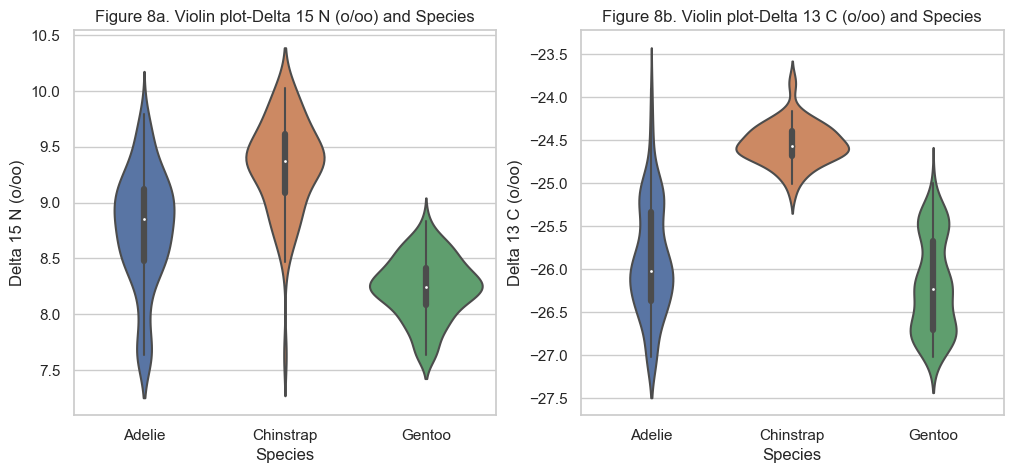

In [368]:
fig, ax=plt.subplots(1,2,figsize=(12,5))
isotopes=['Delta 15 N (o/oo)','Delta 13 C (o/oo)']
subplot=['a','b']
for i in range(len(isotopes)):
    sns.violinplot(y=isotopes[i], x='Species', data=penguins_df,ax=ax[i])
    ax[i].set_title(f'Figure 8{subplot[i]}. Violin plot-{isotopes[i]} and Species')
